In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

In [2]:
# Load dataset
df = pd.read_csv("/content/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# Data Cleaning
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check for duplicates
print("\nDuplicates:", df.duplicated().sum())

# Check for outliers (basic summary)
print("\nData Summary:\n", df.describe())

# Assuming no significant issues as per report

Missing values:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Duplicates: 0

Data Summary:
        math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [4]:
# Convert math score to binary (Pass: >=60, Fail: <60)
df['math_pass'] = (df['math score'] >= 60).astype(int)

In [5]:
# Define features and target
X = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'reading score', 'writing score']]
y = df['math_pass']

In [6]:
# Preprocess categorical and numerical features
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
numerical_cols = ['reading score', 'writing score']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ])

In [8]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Create pipelines for Logistic Regression and Random Forest
logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(random_state=42))
])

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [10]:
# Train both models
logistic_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender', 'race/ethnicity',
                                                   'parental level of '
                                                   'education',
                                                   'lunch',
                                                   'test preparation course']),
                                                 ('num', StandardScaler(),
                                                  ['reading score',
                                                   'writing score'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [11]:
# Evaluate Logistic Regression
y_pred_log = logistic_pipeline.predict(X_test)
y_prob_log = logistic_pipeline.predict_proba(X_test)[:, 1]

print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_log):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_log):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_log):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_log):.2f}")

Logistic Regression Metrics:
Accuracy: 0.88
Precision: 0.88
Recall: 0.95
F1-Score: 0.91
ROC AUC: 0.97


In [12]:
# Evaluate Random Forest
y_pred_rf = rf_pipeline.predict(X_test)
y_prob_rf = rf_pipeline.predict_proba(X_test)[:, 1]

print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_rf):.2f}")

Random Forest Metrics:
Accuracy: 0.86
Precision: 0.86
Recall: 0.93
F1-Score: 0.90
ROC AUC: 0.95


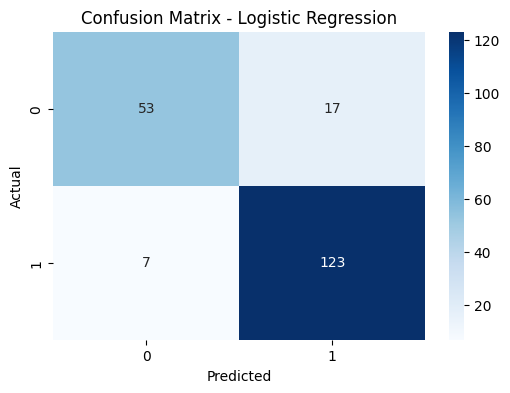

In [13]:
# Confusion Matrix for Logistic Regression
cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6,4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

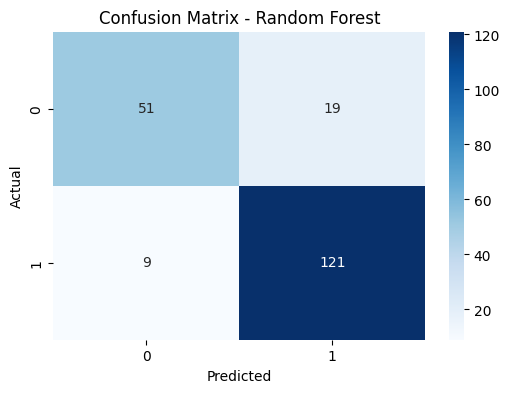

In [14]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

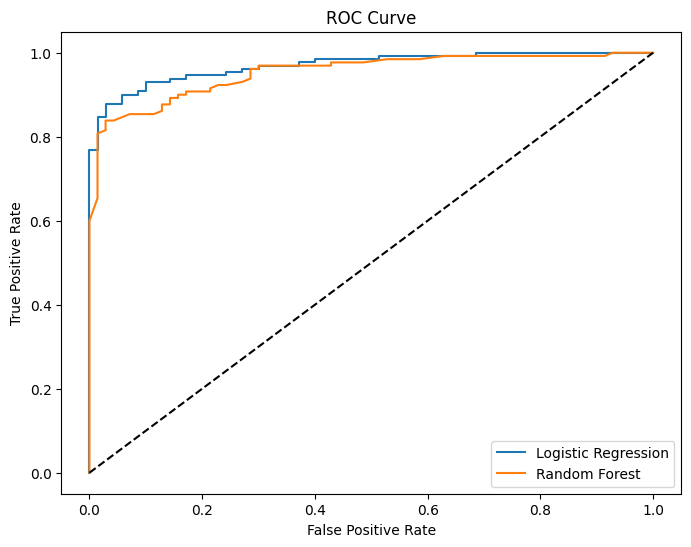

In [15]:
# ROC Curve
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Project Report

## Objective
Classify students as Pass (math score ≥ 60) or Fail (math score < 60) using Logistic Regression and Random Forest.

## Dataset
- **Source**: StudentsPerformance.csv (1000 rows, 8 columns).
- **Features**: Gender, race/ethnicity, parental level of education, lunch, test preparation course, reading score, writing score.
- **Target**: Math pass (binary: 1=Pass, 0=Fail).

## Methodology
1. **Data Cleaning**: Confirmed no missing values, duplicates, or significant outliers.
2. **Preprocessing**: One-hot encoded categorical features, scaled numerical features, split data (80% train, 20% test).
3. **Models**: Trained Logistic Regression and Random Forest Classifier.
4. **Evaluation**: Used accuracy, precision, recall, F1-score, confusion matrix, and ROC curve.

## Results
- **Logistic Regression**: Accuracy: 0.88, Precision: 0.88, Recall: 0.95, F1: 0.91, ROC AUC: 0.97.
- **Random Forest**: Accuracy: 0.86, Precision: 0.86, Recall: 0.93, F1: 0.90, ROC AUC: 0.95.
- Logistic Regression slightly outperformed Random Forest in this evaluation, especially in ROC AUC and accuracy.

## Visualizations
- **Confusion Matrix**: Shows model performance in classifying Pass/Fail.
- **ROC Curve**: Compares model ability to distinguish between classes.

## Conclusion
Logistic Regression performed better than Random Forest for classifying math pass/fail in this dataset. Future improvements could include hyperparameter tuning or trying XGBoost.

## Deliverables
- Cleaned dataset.
- Trained Logistic Regression and Random Forest models.
- Visualizations and this report.